In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
PATH =  os.getcwd()

data = pd.read_csv(PATH +  '\\smoke_detection_iot.csv')

In [3]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
data.shape

(62630, 16)

In [5]:
data = data.drop(['Unnamed: 0', 'UTC'],axis=1)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [6]:
y = data['Fire Alarm'].values
x = data.drop('Fire Alarm', axis=1)

print('x shape : ',x.shape)
print('y shape : ',y.shape)

x shape :  (62630, 13)
y shape :  (62630,)


# SCALER AND SPLIT

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [10]:
pd.DataFrame(y_test).value_counts()

1    8932
0    3594
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
x_train = StandardScaler.fit_transform(x_train)
x_val = StandardScaler.fit_transform(x_val)
x_test = StandardScaler.fit_transform(x_test)

In [12]:
print('x_train shape : ',x_train.shape)
print('x_val shape : ',x_val.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_val shape : ',y_val.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (40083, 13)
x_val shape :  (10021, 13)
x_test shape :  (12526, 13)
y_train shape :  (40083,)
y_val shape :  (10021,)
y_test shape :  (12526,)


# CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [14]:
channel_1 = 64

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(channel_1, kernel_size=5, input_shape=(13,1), activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [15]:
lr = 0.05

adam = Adam(lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 32)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,833
Trainable params: 16,833
Non-trainable params: 0
____________________________________________________

In [16]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10
)

Epoch 1/10
1253/1253 [==============================] - 3s 2ms/step - loss: 0.1301 - accuracy: 0.9535 - val_loss: 0.0808 - val_accuracy: 0.9651
Epoch 2/10
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0978 - accuracy: 0.9752 - val_loss: 0.0394 - val_accuracy: 0.9841
Epoch 3/10
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0180 - val_accuracy: 0.9948
Epoch 4/10
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0151 - val_accuracy: 0.9952
Epoch 5/10
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.0169 - val_accuracy: 0.9941
Epoch 6/10
1253/1253 [==============================] - 2s 2ms/step - loss: 0.1285 - accuracy: 0.9835 - val_loss: 0.0471 - val_accuracy: 0.9768
Epoch 7/10
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0329 - accuracy: 0.9880 - val_loss: 0.0193 - val_accuracy:

In [17]:
model.evaluate(x_test, y_test)

392/392 [==============================] - 0s 852us/step - loss: 0.0380 - accuracy: 0.9958


[0.037974558770656586, 0.9957687854766846]

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

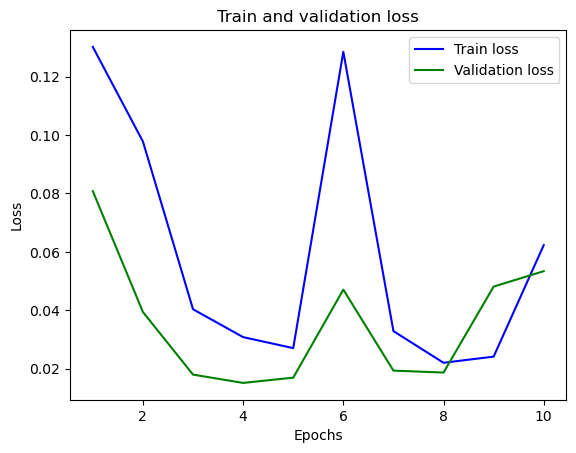

In [19]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

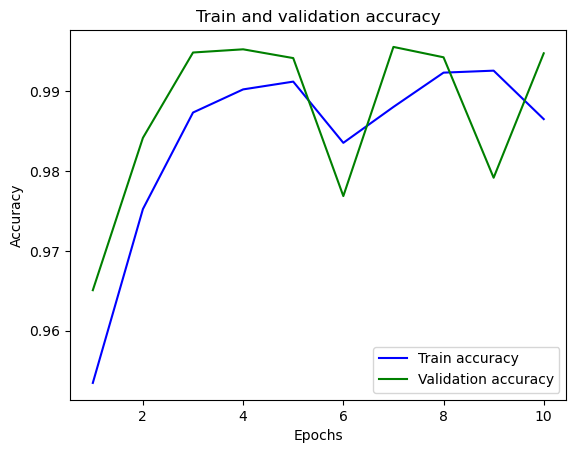

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['accuracy']
val_loss = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Train accuracy')
plt.plot(epochs, val_loss, 'g', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()